In [1]:
!pip install darts
!pip install matplotlib==3.1.3
!pip install optuna
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.5/760.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.0/727.0 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 23.0 MB/s eta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.metrics import mape,mse
from darts.models import TCNModel,RNNModel,RandomForest,RegressionEnsembleModel\
    ,LinearRegressionModel,RegressionModel,BlockRNNModel,NBEATSModel,TFTModel,Theta,TransformerModel,CatBoostModel,XGBModel,NHiTSModel,DLinearModel
import numpy as np
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import MaxAbsScaler
import pickle
import joblib
import datetime
import os

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
id1='1VwIMVcnEGIhzQ9iNQWRw-MkcF67CUe9k'
id2='1QA-XLkzZIilzIceqkWwGGa07orKsurxI'
downloaded1 = drive.CreateFile({'id':id1})
downloaded1.GetContentFile('BTC_1min.csv')
df_1 = pd.read_csv('BTC_1min.csv')
downloaded2 = drive.CreateFile({'id':id2})
downloaded2.GetContentFile('BTC_1min2.csv')
df_2 = pd.read_csv('BTC_1min2.csv')

In [8]:
df_1['date']=df_1['time'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d %H:%M:%S'))
data2=df_1.filter(['close' ,'date','volume'])
data2['date']=pd.to_datetime(data2['date'])
data2=data2.set_index(pd.DatetimeIndex(data2['date']))

In [9]:
df_2['date']=df_2['Timestamp'].apply(lambda d: datetime.datetime.fromtimestamp(int(d)).strftime('%Y-%m-%d %H:%M:%S'))
dff=df_2.iloc[1700000:]
data1=dff.filter(['Close' ,'date','Volume_(BTC)'])
data1['date']=pd.to_datetime(data1['date'])
data1=data1.set_index(pd.DatetimeIndex(data1['date']))
data1=data1.rename(columns={"Close": "close", "Volume_(BTC)": "volume"})

In [10]:
data1=data1[:'2017-08-17 03:59:00']
data=pd.concat([data1,data2],axis=0)

In [11]:
data=data.asfreq('BH')
ds1,ds2=data['close'],data['volume']
ds2=ds2.interpolate()
ds = pd.concat([ds1, ds2],axis=1)

In [12]:
ts=TimeSeries.from_dataframe(ds,fill_missing_dates=True, freq='BH')
from darts.utils import missing_values
ts=missing_values.fill_missing_values(ts,fill='auto')
tsdf=ts.pd_dataframe()


<Axes: xlabel='date'>

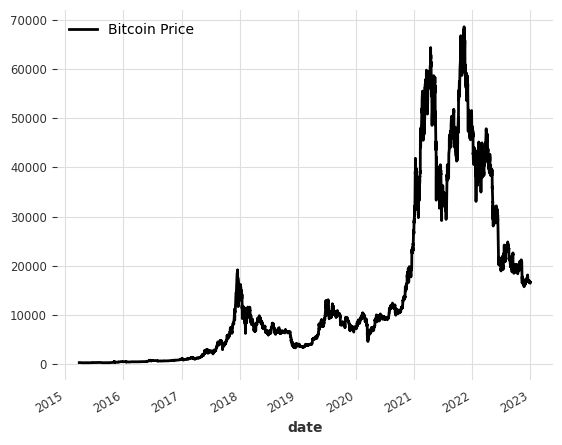

In [13]:
ts['close'].plot(label='Bitcoin Price')

In [ ]:
# Alias    Description
# B        business day frequency
# C        custom business day frequency
# D        calendar day frequency
# W        weekly frequency
# M        month end frequency
# SM       semi-month end frequency (15th and end of month)
# BM       business month end frequency
# CBM      custom business month end frequency
# MS       month start frequency
# SMS      semi-month start frequency (1st and 15th)
# BMS      business month start frequency
# CBMS     custom business month start frequency
# Q        quarter end frequency
# BQ       business quarter end frequency
# QS       quarter start frequency
# BQS      business quarter start frequency
# A, Y     year end frequency
# BA, BY   business year end frequency
# AS, YS   year start frequency
# BAS, BYS business year start frequency
# BH       business hour frequency
# H        hourly frequency
# T, min   minutely frequency
# S        secondly frequency
# L, ms    milliseconds
# U, us    microseconds
# N        nanoseconds
# ts=ts.resample(freq="B")
# ts.time_index
ts=ts.slice(start_ts=pd.Timestamp('2017-01-01'),end_ts=pd.Timestamp('2022-12-30'))
ts.time_index

DatetimeIndex(['2017-01-02 09:04:00', '2017-01-02 10:04:00',
               '2017-01-02 11:04:00', '2017-01-02 12:04:00',
               '2017-01-02 13:04:00', '2017-01-02 14:04:00',
               '2017-01-02 15:04:00', '2017-01-02 16:04:00',
               '2017-01-03 09:04:00', '2017-01-03 10:04:00',
               ...
               '2022-12-28 15:04:00', '2022-12-28 16:04:00',
               '2022-12-29 09:04:00', '2022-12-29 10:04:00',
               '2022-12-29 11:04:00', '2022-12-29 12:04:00',
               '2022-12-29 13:04:00', '2022-12-29 14:04:00',
               '2022-12-29 15:04:00', '2022-12-29 16:04:00'],
              dtype='datetime64[ns]', name='date', length=12512, freq='BH')

In [ ]:
ts_train,ts_val=ts[:-100],ts[-100:]

In [ ]:
EPOCH = 100
FC_N = 12
FC_STRIDE = 10
DROP = 0.1
LEARN = 0.01
BATCH=32
FU_N=10

In [ ]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

# stop training when validation loss does not decrease more than 0.05 (`min_delta`) over
# a period of 5 epochs (`patience`)
my_stopper = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.05,
    mode='min',
)

In [ ]:
# load model
def load(model):
          pred=model.predict(n=len(ts_val))
          # historical_forecast=model.historical_forecasts(ts,forecast_horizon=6,retrain=False,verbose=True)
          # historical_forecast.plot(label='historical_forecasts')
          # ts_train['Close'].plot(label='dataset',c='black')
          ts_val['close'].plot(label='validation_actual',c='yellow')
          # pred['close'].plot(label='validation_pred',c='green')
          print('*'*50)
          pred=pred['close']
          ts_val_close=ts_val['close']
          print(f'mape:{mape(ts_val_close,pred)}')
          pred_future=model.predict(n=len(ts_val)+100)
          pred_future['close'].plot(label='predict')
          print('*'*50)


#NBEATSModel-----------------------------------------------

In [ ]:
nb=NBEATSModel(input_chunk_length=FC_N+1,
        output_chunk_length=FC_N,
        dropout=DROP,
        batch_size=BATCH,
        optimizer_kwargs={'lr': LEARN},
        n_epochs=EPOCH,
        # pl_trainer_kwargs={"callbacks": [my_stopper]}
        )
nb.fit(ts_train,verbose=True,val_series=ts_val)
nb.save('nb.pkl')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.718    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


**************************************************
mape:31.468432743073706


Predicting: 0it [00:00, ?it/s]

**************************************************


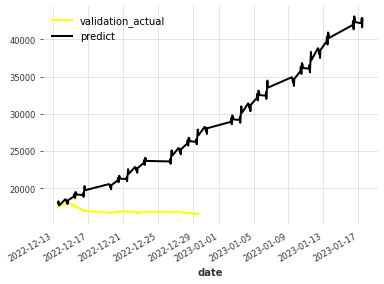

In [ ]:
model=NBEATSModel.load('nb.pkl')
load(model)


#TCNModel-----------------------------------------------

In [ ]:
tc=TCNModel(
        input_chunk_length=FC_N+1,
        output_chunk_length=FC_N,
        dropout=DROP,
        dilation_base=2,
        weight_norm=True,
        batch_size=BATCH,
        kernel_size=7,
        num_filters=5,
        optimizer_kwargs={'lr': LEARN},
        n_epochs=EPOCH,
        force_reset=True,
        random_state=42)
tc.fit(ts_train,verbose=True,val_series=ts_val)
tc.save('tc.pkl')


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 154   
----------------------------------------------------
154       Trainable params
0         Non-trainable params
154       Total params
0.001     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


**************************************************
mape:2.11775740102522


Predicting: 0it [00:00, ?it/s]

**************************************************


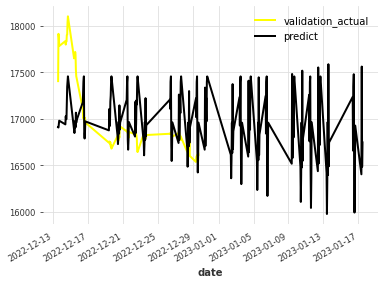

In [ ]:
model=TCNModel.load('tc.pkl')
load(model)


#TransformerModel-----------------------------------------------

In [ ]:
tf=TransformerModel(
        input_chunk_length=FC_N+10,
        output_chunk_length=FC_N,
        dropout=DROP,
        batch_size=BATCH,
        optimizer_kwargs={'lr': LEARN},
        n_epochs=EPOCH,
        force_reset=True,
        nr_epochs_val_period=10,
        d_model=16,
        nhead=4,
        num_encoder_layers=2,
        num_decoder_layers=2,
        dim_feedforward=128,
        )
tf.fit(ts_train,verbose=True,val_series=ts_val)
tf.save('tf.pkl')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 48    
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 23.9 K
6 | decoder             | Linear              | 408   
------------------------------------------------------------
24.3 K    Trainable params
0         Non-trainable params
24.3 K 

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


**************************************************
mape:4.891918556037191


Predicting: 0it [00:00, ?it/s]

**************************************************


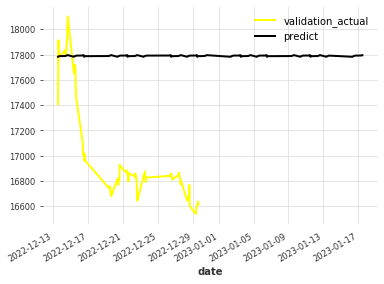

In [ ]:
model=TransformerModel.load('tf.pkl')
load(model)

#BlockRNNModel-----------------------------------------------


In [ ]:
br=BlockRNNModel(input_chunk_length=FC_N+1,
        output_chunk_length=FC_N,
        dropout=DROP,
        batch_size=BATCH,
        optimizer_kwargs={'lr': LEARN},
        n_epochs=EPOCH,
        )
br.fit([ts],verbose=True,val_series=ts_val)
br.save('br.pkl')

In [ ]:
model=BlockRNNModel.load('br.pkl')
load(model)


#LinearRegressionModel-----------------------------------------------


In [ ]:
reg=LinearRegressionModel(lags=4,output_chunk_length=5)
reg.fit(ts)
reg.save('reg.pkl')

In [ ]:
model=LinearRegressionModel.load('reg.pkl')
load(model)


#RNNModel-----------------------------------------------


In [ ]:
rnn=RNNModel(input_chunk_length=FC_N+1,
         n_rnn_layers=4,
         n_epochs=EPOCH,
         model='RNN',
         hidden_dim=25,
         dropout=DROP,
         training_length=FC_N+5
        )
rnn.fit(ts,verbose=True,val_series=ts_val)
rnn.save('rnn.pkl')

In [ ]:
model=RNNModel.load('rnn.pkl')
load(model)



#XGBModel-----------------------------------------------


In [ ]:
xg=XGBModel(
        output_chunk_length=FC_N,
        lags=6
        )
xg.fit(ts,val_series=ts_val)
xg.save('xg.pkl')

In [ ]:
model=XGBModel.load('xg.pkl')
load(model)


#HYPERTUNING -------------------------------------------------------------------------------

In [ ]:
BATCH=512
EPOCH=5
TRIAL=2
VAL_LEN = len(ts_val)

In [ ]:
def evaluate(model,trial):
    preds= model.predict(n=VAL_LEN)
    preds=preds['close']
    smapes = smape(ts_val['close'], preds, n_jobs=-1, verbose=True)
    smape_val = np.mean(smapes)
    trial.set_user_attr(key="best_booster", value=model)
    #sve best model as pkl
    return smape_val if smape_val != np.nan else float("inf")

In [ ]:
def callback(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key="best_booster", value=trial.user_attrs["best_booster"])


# for convenience, print some optimization trials information
def print_callback(study, trial):
    print(f"trial: {trial.number}-------------Current value: {trial.value}")

In [ ]:
import optuna
def plot(study):
  optuna.visualization.plot_contour(study)
  optuna.visualization.plot_optimization_history(study)
  optuna.visualization.plot_intermediate_values(study)

In [ ]:
from optuna.integration.tensorboard import TensorBoardCallback
tensorboard_callbacks=TensorBoardCallback('/content/models/',metric_name='smape')


In [ ]:
def gpu(callbacks,include_year):
          if torch.cuda.is_available():
              pl_trainer_kwargs = {
                  "accelerator": "gpu",
                  "gpus": -1,
                  "auto_select_gpus": True,
                  "callbacks": callbacks,
              }
              num_workers = 4
          else:
              pl_trainer_kwargs = {"callbacks": callbacks}
              num_workers = 0
          # optionally also add the (scaled) year value as a past covariate
          if include_year:
              encoders = {"datetime_attribute": {"past": ["year"]},
                          "transformer": Scaler()}
          else:
              encoders = None
          # reproducibility
          torch.manual_seed(42)
          return encoders,pl_trainer_kwargs

#TCNModel---------------------------------------------

In [ ]:
import numpy as np
import optuna
import torch
from optuna.integration import PyTorchLightningPruningCallback
from pytorch_lightning.callbacks import EarlyStopping
from sklearn.preprocessing import MaxAbsScaler
from darts.dataprocessing.transformers import Scaler
from darts.metrics import smape
from darts.models import TCNModel
from darts.utils.likelihood_models import GaussianLikelihood
warnings.filterwarnings('ignore')

def objective(trial):
    input_chunk_length = trial.suggest_int("input_chunk_length", 12, 36)
    output_chunk_length = trial.suggest_int("output_chunk_length", 1, input_chunk_length-1)
    kernel_size = trial.suggest_int("kernel_size", 2, 5)
    num_filters = trial.suggest_int("num_filters", 1, 5)
    weight_norm = trial.suggest_categorical("weight_norm", [False, True])
    dilation_base = trial.suggest_int("dilation_base", 2, 4)
    dropout = trial.suggest_float("dropout", 0.0, 0.4)
    lr = trial.suggest_float("lr", 5e-5, 1e-3, log=True)
    include_year = trial.suggest_categorical("year", [False, True])
    early_stopper = EarlyStopping("val_loss", min_delta=0.001, patience=5, verbose=True)
    callbacks = [early_stopper]
    # detect if a GPU is available
    encoders,pl_trainer_kwargs=gpu(callbacks,include_year)

    # build the TCN model
    model = TCNModel(
        input_chunk_length=input_chunk_length,
        output_chunk_length=output_chunk_length,
        work_dir='/content/models',
        batch_size=BATCH,
        n_epochs=EPOCH,
        nr_epochs_val_period=1,
        kernel_size=kernel_size,
        num_filters=num_filters,
        weight_norm=weight_norm,
        dilation_base=dilation_base,
        dropout=dropout,
        optimizer_kwargs={"lr": lr},
        add_encoders=encoders,
        likelihood=GaussianLikelihood(),
        pl_trainer_kwargs=pl_trainer_kwargs,
        model_name="tc",
        save_checkpoints=True,
        force_reset=True
    )
    model.fit(
        series=ts_train,
        val_series=ts_val
    )
    return evaluate(model,trial)

# optimize hyperparameters by minimizing the sMAPE on the validation set
if  os.path.exists('/content/tc_study.pkl'):
    study=joblib.load('tc_study.pkl')
else:
    study = optuna.create_study(study_name='tc',direction="minimize",pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))

study.optimize(objective, n_trials=TRIAL, callbacks=[print_callback,callback,tensorboard_callbacks])
# plot(study)
joblib.dump(study,'tc_study.pkl')
best_model=study.user_attrs["best_booster"]
kwargs=study.best_trial.params

INFO:pytorch_lightning.trainer.connectors.accelerator_connector:Auto select gpus: [0]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 57    
----------------------------------------------------
57        Trainable params
0         Non-trainable params
57        Tot

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved. New best score: 377.591


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 130.329 >= min_delta = 0.001. New best score: 247.262


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 49.487 >= min_delta = 0.001. New best score: 197.775


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 30.508 >= min_delta = 0.001. New best score: 167.267


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 21.346 >= min_delta = 0.001. New best score: 145.921
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.trainer.connectors.accelerator_connector:Auto select gpus: [0]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 923.65it/s]
[I 2023-03-09 10:15:49,503] Trial 2 finished with value: 199.583119922005 and parameters: {'input_chunk_length': 13, 'output_chunk_length': 7, 'kernel_size': 4, 'num_filters': 1, 'weight_norm': True, 'dilation_base': 2, 'dropout': 0.20335627092848935, 'lr': 0.0008294259262134941, 'year': False}. Best is trial 1 with value: 155.89006235536434.


trial: 2-------------Current value: 199.583119922005


INFO:pytorch_lightning.trainer.connectors.accelerator_connector:Auto select gpus: [0]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 46    
----------------------------------------------------
46        Trainable params
0         Non-trainable params
46        Tot

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved. New best score: 12.610


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.505 >= min_delta = 0.001. New best score: 12.105


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.333 >= min_delta = 0.001. New best score: 11.772


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.291 >= min_delta = 0.001. New best score: 11.481


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.167 >= min_delta = 0.001. New best score: 11.315
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.trainer.connectors.accelerator_connector:Auto select gpus: [0]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 594.26it/s]
[I 2023-03-09 10:15:56,846] Trial 3 finished with value: 190.7880102918421 and parameters: {'input_chunk_length': 17, 'output_chunk_length': 16, 'kernel_size': 2, 'num_filters': 1, 'weight_norm': False, 'dilation_base': 2, 'dropout': 0.13884706995763496, 'lr': 0.0008696488108264047, 'year': False}. Best is trial 1 with value: 155.89006235536434.


trial: 3-------------Current value: 190.7880102918421


In [ ]:
#train and save model
kwargs.popitem()
lr=kwargs.popitem()
kwargs['optimizer_kwargs']={'lr':lr[1]}
model=TCNModel(**kwargs)
model.fit(series=ts_train,val_series=ts_val)
model.save('/content/tc.pkl')
print('*'*50,'Best_Parameters')
print(kwargs)
print('*'*50)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 441   
----------------------------------------------------
441       Trainable params
0         Non-trainable params
441       Total params
0.004     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

************************************************** Best_Parameters
{'input_chunk_length': 23, 'output_chunk_length': 14, 'kernel_size': 3, 'num_filters': 5, 'weight_norm': True, 'dilation_base': 4, 'dropout': 0.1219604795484167, 'optimizer_kwargs': {'lr': 5.081505122095793e-05}}
**************************************************


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


**************************************************
mape:11.039651200946185


Predicting: 0it [00:00, ?it/s]

**************************************************


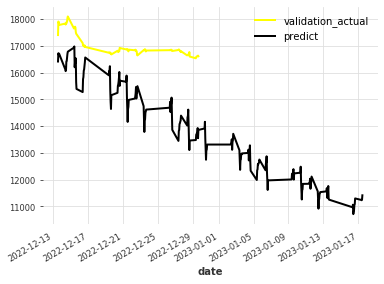

In [ ]:
#load model
model=TCNModel.load('tc.pkl')
load(model)

#RNN    LSTM    GURU-------------------

In [ ]:
import numpy as np
import optuna
import torch
from optuna.integration import PyTorchLightningPruningCallback
from pytorch_lightning.callbacks import EarlyStopping
from sklearn.preprocessing import MaxAbsScaler
from darts.dataprocessing.transformers import Scaler
from darts.metrics import smape
from darts.models import TCNModel
from darts.utils.likelihood_models import GaussianLikelihood

def objective(trial):
    ############
    input_chunk_length = trial.suggest_int("input_chunk_length", 12, 36)
    output_chunk_length = trial.suggest_int("output_chunk_length", 1, input_chunk_length-1)
    dropout = trial.suggest_float("dropout", 0.0, 0.4)
    lr = trial.suggest_float("lr", 5e-5, 1e-3, log=True)
    hidden_dim=trial.suggest_int("hidden_dim", 1, 2048)
    n_rnn_layers=trial.suggest_int("n_rnn_layers", 1, 10)
    include_year = trial.suggest_categorical("year", [False, True])
    model_name=trial.suggest_categorical("model", ['GURU','LSTM', 'RNN'])
    training_length= trial.suggest_int("training_length",input_chunk_length+5 ,input_chunk_length+20 )
    ###########
    early_stopper = EarlyStopping("val_loss", min_delta=0.001, patience=5, verbose=True)
    callbacks = [early_stopper]
    encoders,pl_trainer_kwargs=gpu(callbacks,include_year)

    model = RNNModel(
        input_chunk_length=input_chunk_length,
        output_chunk_length=output_chunk_length,
        work_dir='/content/models',
        batch_size=BATCH,
        n_epochs=EPOCH,
        model=model_name,
        n_rnn_layers=n_rnn_layers,
        hidden_dim=hidden_dim,
        training_length=training_length,
        nr_epochs_val_period=1,
        dropout=dropout,
        optimizer_kwargs={"lr": lr},
        likelihood=GaussianLikelihood(),
        model_name="rnn",
        save_checkpoints=True,
        force_reset=True

    )
    model.fit(
        series=ts_train,
        val_series=ts_val
    )
    return evaluate(model,trial)

# optimize hyperparameters by minimizing the sMAPE on the validation set
if  os.path.exists('/content/rnn_study.pkl'):
    study=joblib.load('rnn_study.pkl')
else:
    study = optuna.create_study(study_name='rnn',direction="minimize",pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))

study.optimize(objective, n_trials=TRIAL, callbacks=[print_callback,callback,tensorboard_callbacks])
# plot(study)
joblib.dump(study,'rnn_study.pkl')
best_model=study.user_attrs["best_booster"]
kwargs=study.best_trial.params


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 314 K 
4 | V             | Linear           | 1.0 K 
---------------------------------------------------
315 K     Trainable params
0         Non-trainable params
315 K     Total params
2.524     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 15.83it/s]
[I 2023-03-08 06:46:00,144] Finished trial#0 with value: 199.97877707720767 with parameters: {'input_chunk_length': 17, 'output_chunk_length': 15, 'dropout': 0.17937475673906916, 'lr': 0.00011879000242075574, 'hidden_dim': 250, 'n_rnn_layers': 3, 'year': False, 'model': 'RNN', 'training_length': 28}. Best is trial#0 with value: 199.97877707720767.


trial: 0-------------Current value: 199.97877707720767


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 23.0 M
4 | V             | Linear           | 5.8 K 
---------------------------------------------------
23.0 M    Trainable params
0         Non-trainable params
23.0 M    Total params
183.700   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 270.36it/s]
[I 2023-03-08 08:24:28,894] Finished trial#1 with value: 199.91519700270487 with parameters: {'input_chunk_length': 26, 'output_chunk_length': 15, 'dropout': 0.07346578548474136, 'lr': 0.00021505238806646582, 'hidden_dim': 1444, 'n_rnn_layers': 6, 'year': True, 'model': 'RNN', 'training_length': 31}. Best is trial#1 with value: 199.91519700270487.


trial: 1-------------Current value: 199.91519700270487


In [ ]:
#save and train model
kwargs={'input_chunk_length': 26, 'output_chunk_length': 15, 'dropout': 0.07346578548474136, 'lr': 0.00021505238806646582, 'hidden_dim': 1444, 'n_rnn_layers': 6, 'model': 'RNN', 'training_length': 31}
# del kwargs['year']
lr=kwargs['lr']
del kwargs['lr']
kwargs['optimizer_kwargs']={'lr':lr}
model=RNNModel(**kwargs)
model.fit(series=ts_train,val_series=ts_val)
model.save('/content/rnn.pkl')
print('*'*50,'Best_Parameters')
kwargs
print('*'*50,'Showing Best Model')
print(kwargs)
print('*'*50)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 23.0 M
4 | V             | Linear           | 2.9 K 
---------------------------------------------------
23.0 M    Trainable params
0         Non-trainable params
23.0 M    Total params
183.677   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

************************************************** Best_Parameters
************************************************** Showing Best Model
{'input_chunk_length': 26, 'output_chunk_length': 15, 'dropout': 0.07346578548474136, 'hidden_dim': 1444, 'n_rnn_layers': 6, 'model': 'RNN', 'training_length': 31, 'optimizer_kwargs': {'lr': 0.00021505238806646582}}
**************************************************


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


**************************************************
mape:98.97584041207105


Predicting: 0it [00:00, ?it/s]

**************************************************


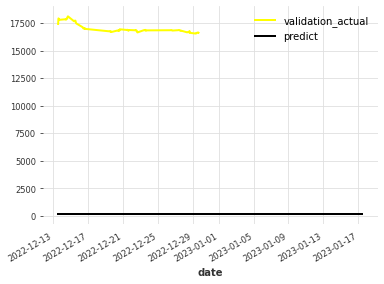

In [ ]:
#load model
model=RNNModel.load('rnn.pkl')
load(model)

#BlockRNNModel---------------------------------

In [ ]:
import numpy as np
import optuna
import torch
from optuna.integration import PyTorchLightningPruningCallback
from pytorch_lightning.callbacks import EarlyStopping
from sklearn.preprocessing import MaxAbsScaler
from darts.dataprocessing.transformers import Scaler
from darts.metrics import smape
from darts.models import TCNModel
from darts.utils.likelihood_models import GaussianLikelihood

def objective(trial):
    ############
    input_chunk_length = trial.suggest_int("input_chunk_length", 12, 36)
    output_chunk_length = trial.suggest_int("output_chunk_length", 1, input_chunk_length-1)
    dropout = trial.suggest_float("dropout", 0.0, 0.4)
    lr = trial.suggest_float("lr", 5e-5, 1e-3, log=True)
    include_year = trial.suggest_categorical("year", [False, True])
    ###########
    early_stopper = EarlyStopping("val_loss", min_delta=0.001, patience=5, verbose=True)
    callbacks = [early_stopper]
    encoders,pl_trainer_kwargs=gpu(callbacks,include_year)

    model = BlockRNNModel(
        input_chunk_length=input_chunk_length,
        output_chunk_length=output_chunk_length,
        work_dir='/content/models',
        batch_size=BATCH,
        n_epochs=EPOCH,
        nr_epochs_val_period=1,
        dropout=dropout,
        optimizer_kwargs={"lr": lr},
        likelihood=GaussianLikelihood(),
        model_name="br",
        save_checkpoints=True,
        force_reset=True

    )
    model.fit(
        series=ts_train,
        val_series=ts_val
    )
    return evaluate(model,trial)

# optimize hyperparameters by minimizing the sMAPE on the validation set
if  os.path.exists('/content/br_study.pkl'):
    study=joblib.load('br_study.pkl')
else:
    study = optuna.create_study(study_name='br',direction="minimize",pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))

study.optimize(objective, n_trials=TRIAL, callbacks=[print_callback,callback,tensorboard_callbacks])
# plot(study)
joblib.dump(study,'br_study.pkl')
best_model=study.user_attrs["best_booster"]
kwargs=study.best_trial.params


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 725   
4 | fc            | Sequential       | 1.8 K 
---------------------------------------------------
2.5 K     Trainable params
0         Non-trainable params
2.5 K     Total params
0.020     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 458.04it/s]
[I 2023-03-06 15:20:50,548] Finished trial#0 with value: 199.9921965739928 with parameters: {'input_chunk_length': 19, 'output_chunk_length': 17, 'dropout': 0.1479966453174739, 'lr': 5.469364906354891e-05, 'year': False}. Best is trial#0 with value: 199.9921965739928.


trial: 0-------------Current value: 199.9921965739928


In [ ]:
#save and train model
del kwargs['year']
lr=kwargs['lr']
del kwargs['lr']
kwargs['optimizer_kwargs']={'lr':lr}
model=BlockRNNModel(**kwargs)
model.fit(series=ts_train,val_series=ts_val)
model.save('/content/br.pkl')
print('*'*50,'Best_Parameters')
print(kwargs)
print('*'*50)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 725   
4 | fc            | Sequential       | 884   
---------------------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params
0.013     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


************************************************** Best_Parameters
************************************************** Showing Best Model


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


**************************************************
mape:99.76774220360291


Predicting: 0it [00:00, ?it/s]

**************************************************


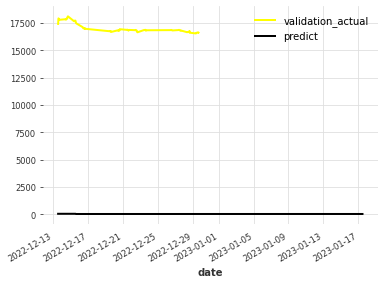

In [ ]:
#load model
model=BlockRNNModel.load('br.pkl')
load(model)

#NBEATSModel---------------------------

In [ ]:
import numpy as np
import optuna
import torch
from optuna.integration import PyTorchLightningPruningCallback
from pytorch_lightning.callbacks import EarlyStopping
from sklearn.preprocessing import MaxAbsScaler
from darts.dataprocessing.transformers import Scaler
from darts.metrics import smape
from darts.models import TCNModel
from darts.utils.likelihood_models import GaussianLikelihood

def objective(trial):
    ############
    input_chunk_length = trial.suggest_int("input_chunk_length", 12, 36)
    output_chunk_length = trial.suggest_int("output_chunk_length", 1, input_chunk_length-1)
    dropout = trial.suggest_float("dropout", 0.0, 0.4)
    lr = trial.suggest_float("lr", 5e-5, 1e-3, log=True)
    include_year = trial.suggest_categorical("year", [False, True])
    ###########
    early_stopper = EarlyStopping("val_loss", min_delta=0.001, patience=5, verbose=True)
    callbacks = [early_stopper]
    encoders,pl_trainer_kwargs=gpu(callbacks,include_year)

    model = NBEATSModel(
        input_chunk_length=input_chunk_length,
        output_chunk_length=output_chunk_length,
        work_dir='/content/models',
        batch_size=BATCH,
        n_epochs=EPOCH,
        nr_epochs_val_period=1,
        dropout=dropout,
        optimizer_kwargs={"lr": lr},
        likelihood=GaussianLikelihood(),
        model_name="nb",
        save_checkpoints=True,
        force_reset=True

    )
    model.fit(
        series=ts_train,
        val_series=ts_val
    )
    return evaluate(model,trial)

# optimize hyperparameters by minimizing the sMAPE on the validation set
if  os.path.exists('/content/nb_study.pkl'):
    study=joblib.load('nb_study.pkl')
else:
    study = optuna.create_study(study_name='rnn',direction="minimize",pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))

study.optimize(objective, n_trials=TRIAL, callbacks=[print_callback,callback,tensorboard_callbacks])
# plot(study)
joblib.dump(study,'nb_study.pkl')
best_model=study.user_attrs["best_booster"]
kwargs=study.best_trial.params


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.6 M 
---------------------------------------------------
6.6 M     Trainable params
1.7 K     Non-trainable params
6.6 M     Total params
52.796    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 582.62it/s]
[I 2023-03-06 15:33:31,441] Finished trial#0 with value: 182.50942080531232 with parameters: {'input_chunk_length': 35, 'output_chunk_length': 13, 'dropout': 0.0029584240818673726, 'lr': 0.00011107371955845531, 'year': False}. Best is trial#0 with value: 182.50942080531232.


trial: 0-------------Current value: 182.50942080531232


In [ ]:
#save and train model
del kwargs['year']
lr=kwargs['lr']
del kwargs['lr']
kwargs['optimizer_kwargs']={'lr':lr}
model=NBEATSModel(**kwargs)
model.fit(series=ts_train,val_series=ts_val)
model.save('/content/nb.pkl')
print('*'*50,'Best_Parameters')
print(kwargs)
print('*'*50)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.6 M 
---------------------------------------------------
6.6 M     Trainable params
1.7 K     Non-trainable params
6.6 M     Total params
52.488    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

************************************************** Best_Parameters
{'input_chunk_length': 35, 'output_chunk_length': 13, 'dropout': 0.0029584240818673726, 'optimizer_kwargs': {'lr': 0.00011107371955845531}}
**************************************************


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


**************************************************
mape:6.857192400708321


Predicting: 0it [00:00, ?it/s]

**************************************************


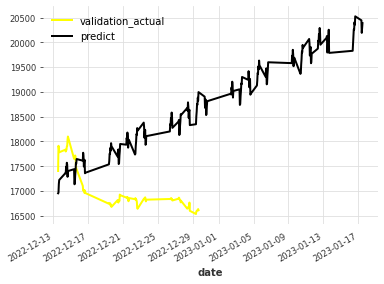

In [ ]:
#load model
model=NBEATSModel.load('nb.pkl')
load(model)

#TransformerModel-----------------------------------------

In [ ]:
import numpy as np
import optuna
import torch
from optuna.integration import PyTorchLightningPruningCallback
from pytorch_lightning.callbacks import EarlyStopping
from sklearn.preprocessing import MaxAbsScaler
from darts.dataprocessing.transformers import Scaler
from darts.metrics import smape
from darts.models import TCNModel
from darts.utils.likelihood_models import GaussianLikelihood

def objective(trial):
    ############
    input_chunk_length = trial.suggest_int("input_chunk_length", 12, 36)
    output_chunk_length = trial.suggest_int("output_chunk_length", 1, input_chunk_length-1)
    dropout = trial.suggest_float("dropout", 0.0, 0.4)
    lr = trial.suggest_float("lr", 5e-5, 1e-3, log=True)
    include_year = trial.suggest_categorical("year", [False, True])
    ###########
    early_stopper = EarlyStopping("val_loss", min_delta=0.001, patience=5, verbose=True)
    callbacks = [early_stopper]
    encoders,pl_trainer_kwargs=gpu(callbacks,include_year)

    model = TransformerModel(
        input_chunk_length=input_chunk_length,
        output_chunk_length=output_chunk_length,
        work_dir='/content/models',
        batch_size=BATCH,
        n_epochs=EPOCH,
        nr_epochs_val_period=1,
        dropout=dropout,
        optimizer_kwargs={"lr": lr},
        likelihood=GaussianLikelihood(),
        model_name="tf",
        save_checkpoints=True,
        force_reset=True

    )
    model.fit(
        series=ts_train,
        val_series=ts_val
    )
    return evaluate(model,trial)

# optimize hyperparameters by minimizing the sMAPE on the validation set
if  os.path.exists('/content/tf_study.pkl'):
    study=joblib.load('tf_study.pkl')
else:
    study = optuna.create_study(study_name='tf',direction="minimize",pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))

study.optimize(objective, n_trials=TRIAL, callbacks=[print_callback,callback,tensorboard_callbacks])
# plot(study)
joblib.dump(study,'tf_study.pkl')
best_model=study.user_attrs["best_booster"]
kwargs=study.best_trial.params


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 192   
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 548 K 
6 | decoder             | Linear              | 1.8 K 
------------------------------------------------------------
550 K     Trainable params
0         Non-trainable params
550 K  

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]


100%|██████████| 1/1 [00:00<00:00, 245.86it/s]
[I 2023-03-06 15:39:28,679] Finished trial#0 with value: 199.98470664082038 with parameters: {'input_chunk_length': 14, 'output_chunk_length': 7, 'dropout': 0.3684036428589756, 'lr': 7.047458075828725e-05, 'year': True}. Best is trial#0 with value: 199.98470664082038.


trial: 0-------------Current value: 199.98470664082038


In [ ]:
#save and train model
del kwargs['year']
lr=kwargs['lr']
del kwargs['lr']
kwargs['optimizer_kwargs']={'lr':lr}
model=TransformerModel(**kwargs)
model.fit(series=ts_train,val_series=ts_val)
model.save('/content/tf.pkl')
print('*'*50,'Best_Parameters')
print(kwargs)
print('*'*50)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3 | encoder             | Linear              | 192   
4 | positional_encoding | _PositionalEncoding | 0     
5 | transformer         | Transformer         | 548 K 
6 | decoder             | Linear              | 910   
------------------------------------------------------------
549 K     Trainable params
0         Non-trainable params
549 K  

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

************************************************** Best_Parameters
{'input_chunk_length': 14, 'output_chunk_length': 7, 'dropout': 0.3684036428589756, 'optimizer_kwargs': {'lr': 7.047458075828725e-05}}
**************************************************


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


**************************************************
mape:99.92296273999901


Predicting: 0it [00:00, ?it/s]

**************************************************


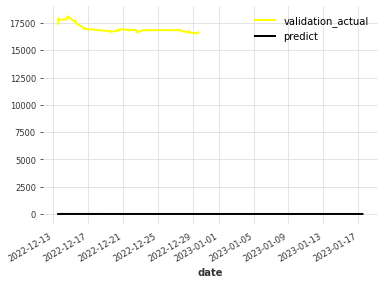

In [ ]:
#load model
model=TransformerModel.load('tf.pkl')
load(model)

#xgbmodel ------------------------------------------------

In [ ]:
import numpy as np
import optuna
import torch
from optuna.integration import PyTorchLightningPruningCallback
from pytorch_lightning.callbacks import EarlyStopping
from sklearn.preprocessing import MaxAbsScaler
from darts.dataprocessing.transformers import Scaler
from darts.metrics import smape
from darts.models import TCNModel
from darts.utils.likelihood_models import GaussianLikelihood

def objective(trial):
    ############
    lags_0 = trial.suggest_int("lags_0", -100,-3)
    lags_1 = trial.suggest_int("lags_0", lags_0,-3)
    output_chunk_length = trial.suggest_int("output_chunk_length", 5, 132)
    include_year = trial.suggest_categorical("year", [False, True])

    ###########
    early_stopper = EarlyStopping("val_loss", min_delta=0.001, patience=5, verbose=True)
    callbacks = [early_stopper]
    encoders,pl_trainer_kwargs=gpu(callbacks,include_year)

    model = XGBModel(
        output_chunk_length=output_chunk_length,
        lags=[lags_0,lags_1+2])
    model.fit(
        series=ts_train,
    )
    return evaluate(model,trial)

# optimize hyperparameters by minimizing the sMAPE on the validation set
if  os.path.exists('/content/xg_study.pkl'):
    study=joblib.load('xg_study.pkl')
else:
    study = optuna.create_study(study_name='xg',direction="minimize",pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))

study.optimize(objective, n_trials=TRIAL, callbacks=[print_callback,callback,tensorboard_callbacks])
# plot(study)
joblib.dump(study,'xg_study.pkl')
best_model=study.user_attrs["best_booster"]
kwargs=study.best_trial.params


[I 2023-03-09 10:21:03,762] A new study created in memory with name: xg


In [ ]:
#save and train model
# lags_0=kwargs['lags_0']
# del kwargs['lags_0']
# del kwargs['year']
# kwargs['lags']=[lags_0,lags_0+3]
model=XGBModel(**kwargs)
model.fit(series=ts_train)
model.save('/content/xg.pkl')
print('*'*50,'Best_Parameters')
print(kwargs)
print('*'*50)

************************************************** Best_Parameters
{'output_chunk_length': 37, 'lags': [-43, -40]}
**************************************************


**************************************************
mape:2.830883768680516
**************************************************


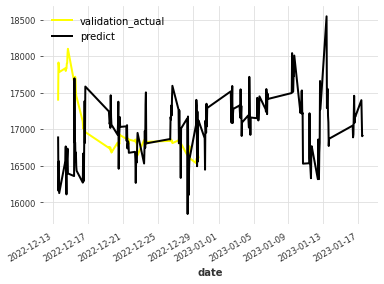

In [ ]:
#load model
model=XGBModel.load('xg.pkl')
load(model)

#linearregression ---------------------------------------------------

In [ ]:
import numpy as np
import optuna
import torch
from optuna.integration import PyTorchLightningPruningCallback
from pytorch_lightning.callbacks import EarlyStopping
from sklearn.preprocessing import MaxAbsScaler
from darts.dataprocessing.transformers import Scaler
from darts.metrics import smape
from darts.models import TCNModel
from darts.utils.likelihood_models import GaussianLikelihood
from sklearn.linear_model import BayesianRidge


def objective(trial):
    ############
    lags_0 = trial.suggest_int("lags_0", -100,-3)
    lags_1 = trial.suggest_int("lags_0", lags_0,-3)
    output_chunk_length = trial.suggest_int("output_chunk_length", 5, 132)
    include_year = trial.suggest_categorical("year", [False, True])

    ###########
    early_stopper = EarlyStopping("val_loss", min_delta=0.001, patience=5, verbose=True)
    callbacks = [early_stopper]
    encoders,pl_trainer_kwargs=gpu(callbacks,include_year)

    model = LinearRegressionModel(
        output_chunk_length=output_chunk_length,
        lags=[lags_0,lags_1+2])
    model.fit(
        series=ts_train,
    )
    return evaluate(model,trial)

# optimize hyperparameters by minimizing the sMAPE on the validation set
if  os.path.exists('/content/lr_study.pkl'):
    study=joblib.load('lr_study.pkl')
else:
    study = optuna.create_study(study_name='lr',direction="minimize",pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))

study.optimize(objective, n_trials=TRIAL, callbacks=[print_callback,callback,tensorboard_callbacks])
# plot(study)
joblib.dump(study,'lr_study.pkl')
best_model=study.user_attrs["best_booster"]
kwargs=study.best_trial.params


100%|██████████| 1/1 [00:00<00:00, 640.45it/s]
[I 2023-03-07 15:04:23,037] Finished trial#202 with value: 1.526596187886333 with parameters: {'lags_0': -26, 'output_chunk_length': 40, 'year': False}. Best is trial#191 with value: 1.5193045155710796.


trial: 202-------------Current value: 1.526596187886333


100%|██████████| 1/1 [00:00<00:00, 721.66it/s]
[I 2023-03-07 15:04:25,030] Finished trial#203 with value: 1.777257882737333 with parameters: {'lags_0': -28, 'output_chunk_length': 41, 'year': False}. Best is trial#191 with value: 1.5193045155710796.


trial: 203-------------Current value: 1.777257882737333


In [ ]:
#save and train model
lags_0=kwargs['lags_0']
del kwargs['lags_0']
del kwargs['year']
kwargs['lags']=[lags_0,lags_0+3]
model=LinearRegressionModel(**kwargs)
model.fit(series=ts_train)
model.save('/content/lr.pkl')
print('*'*50,'Best_Parameters')
print(kwargs)
print('*'*50)

************************************************** Best_Parameters
{'output_chunk_length': 32, 'lags': [-25, -22]}
**************************************************


**************************************************
mape:1.551791615005805
**************************************************


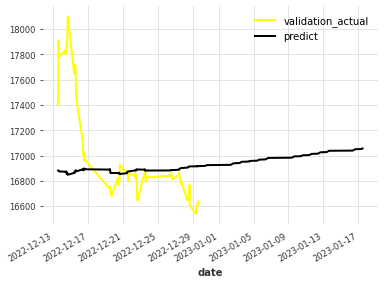

In [ ]:
#load model
model=LinearRegressionModel.load('lr.pkl')
load(model)